✒️ Завдання: Враховуючи тип задачі (класифікація) та характеристики даних (після обробки і підготовки), розробити модель прогнозування відтоку клієнтів.


1. Кожен учасник картки обирає 2 алгоритми машинного навчання для моделювання зі списку алгоритмів нижче і ‼️залишає тут коментар зі своїм вибором:

- Logistic Regression

- Decision Tree

2. На початку свого Jupiter Notebook документу створити короткий markdown і відповісти на 2 питання 1) Чому вами була обрана саме ця модель? 2) Чи підходить вона під задачу та специфіку даних?

3. Завантажити очищений і підготовлений набір даних.

4. Підготувати дані для моделювання: 1) Розділити дані на навчальну, тестову та валідаційну вибірки (напр., у пропорції 70/15/15). 2) Перевірити коректність балансування класів (відтоку та невідтоку).

5. Реалізувати: 1) Навчання обраного алгоритму з використанням крос-валідації (напр., 5-fold Cross-Validation). 2) Налаштувати гіперпараметри для обраного алгоритму - використати GridSearchCV або RandomizedSearchCV для пошуку оптимальних параметрів.

6. Оцінити якість моделі на тестовій вибірці за метриками:
Accuracy
Precision
Recall
F1 Score

7. Побудувати матрицю невідповідностей (confusion_matrix) для аналізу результатів.

8. Зафіксувати результати оцінки якості моделі у вигляді таблиці та/або звіту(classification_report).

9. Задокументувати результати моделювання (markdown в кінці вашого Notebook): 1) Обгрунтування вибору алгоритму: Як він працює, коли він дає кращі результати (переваги). Вказати обмеження чи недоліки (напр., потребує більше даних або ресурсів). 2) Описати гіперпараметри моделі. 3) Результати оцінювання (метрики, confusion matrix) з наглядними візуалізаціями де можливо. 4) Підготувати візуалізації:

- ROC-криву.
- Графіки важливості ознак (feature_importance) для моделей, що це підтримують.

# The model selection: Why Logistic Regression?

Logistic Regression might be the best choice for the problem of our project due to the following reasons:

1. ***Problem Type:*** Logistic Regression is a well-suited algorithm for binary classification problems like predicting customer churn (e.g., churn or no churn). It directly models the probability of an outcome belonging to a specific class, which aligns with the goal of estimating the likelihood of churn.

2. ***Simplicity and Interpretability:*** It is a relatively simple algorithm, making it easy to implement and interpret. The model provides coefficients for each feature, allowing us to understand the relative importance and direction of influence of each predictor on the likelihood of churn.

3. ***Small and Structured Datasets:*** Logistic Regression performs well on small-to-moderate-sized, structured datasets like ours. Our dataset isn’t highly complex or massive, so Logistic Regression can achieve strong results without overfitting.

4. ***Performance on Linearly Separable Data:*** Logistic Regression assumes linear separability between classes. The data features here are linearly separable (or approximately so), so the model can provide highly accurate predictions. Otherwise, even if there is some non-linearity, we can always use feature engineering or polynomial features which extend its performance.

5. ***Robustness to Noise and Less Overfitting:*** Compared to more complex models like Random Forest, Logistic Regression is less prone to overfitting.

6. ***Computational Efficiency:*** It is computationally efficient, making it a practical choice for initial modeling or for situations where resources are limited.

7. ***Balance in Class Distribution:*** Logistic Regression can handle moderately imbalanced datasets using techniques like adjusting class weights, making it adaptable for churn datasets with imbalance.

8. ***Evaluation Metrics Alignment:*** Logistic Regression naturally outputs probabilities, which makes it easier to calculate and optimize key metrics like Precision, Recall, F1 Score, and ROC-AUC.

***Why Logistic Regression May Not Be the Best:*** If the dataset would have contained complex, non-linear relationships or interactions between features, Logistic Regression might underperform. In such cases, models like *Random Forest* or *Gradient Boosting* could outperform it.

***Conclusion:*** Logistic Regression is likely the best choice for its simplicity, interpretability, and suitability for structured, binary classification tasks, especially in the context of churn prediction where the goal is to not only predict but also understand why customers churn. It also serves as a great baseline model to benchmark against more complex algorithms.

# Imports

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

# Data Visualization Methods

In [240]:
def plot_conf_matrix(conf_matrix):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


def plot_roc_auc(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="lightblue", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

def plot_feature_importance(feature_importance):
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Coefficient", y="Feature", data=feature_importance, hue="Coefficient", palette="Blues")
    plt.title("Feature Importance (Logistic Regression Coefficients)")
    plt.show()

# Data Preparation

### Datasets Load + DataFrame build

- **Step 1.** Loading preprocessed and saved dataset:

In [225]:
df = pd.read_csv("preprocessed_dataset.csv")

- **Step 2.** Cheking first 3 rows of the dataset:

In [226]:
df.head(3)

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,0.0,0.0,0.963910,-2.346472,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.834586,-0.494918,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.972932,2.943684,0.0,0.0,0.0,0.0,1


- **Step 3.** Cheking missing values:

In [227]:
df.isna().sum()

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

- **Step 4.** Preparing data for modeling:

In [228]:
X = df.drop("churn", axis=1)  # features
y = df["churn"] # target

### Splitting the data (train, validation, test)

Splitting the dataset into:

- training (70%) - to train the model, 
- validation (15%) - for hyperparameter tuning and model selection,
- test (15%) - for final evaluation of the model’s performance

This split ensures that the model is trained on a sufficient amount of data while leaving enough data for validation and testing.

In [229]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Train Data Balance check 

In [230]:
print("Class Distribution in Training Set:")
print(y_train.value_counts(normalize=True))

Class Distribution in Training Set:
churn
1    0.566459
0    0.433541
Name: proportion, dtype: float64


The dataset is **slightly imbalanced**, with more customers who churned (1) than those who did not (0). This imbalance can affect the model’s performance, as it might become biased toward predicting the majority class (1). 

While this imbalance is not extreme, it’s important to monitor the model’s performance on both classes and consider techniques like class weighting or resampling if the model shows bias toward the majority class. Using metrics like precision, recall, and F1-score instead of accuracy, also could be useful as they are more informative for imbalanced datasets.

# The Logistic Regression Model

- **Step 1.** Building the Logistic Regression Model:

In [231]:
model_lg1 = LogisticRegression(random_state=42, class_weight="balanced")

- **Step 2.** Training the model 1 using 5-fold Cross-Validation:

In [232]:
cv_scores = cross_val_score(model_lg1, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores)}")

Cross-Validation Accuracy Scores: [0.73593843 0.74037892 0.73712256 0.75059207 0.72779751]
Mean Cross-Validation Accuracy: 0.7383658969804617


### Finding the best Hyperparameters

- **Step 3.** Hyperparameter tuning using GridSearchCV:

In [233]:
param_grid = {'C': [0.1, 1, 10]}

grid_search = GridSearchCV(model_lg1, param_grid, cv=5, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=-1, param_grid={'C': [0.1, 1, 10]}, scoring='f1')

According to the GridsearchCV results, the best hyperparameters seem to be:

In [234]:
model_lg2 = grid_search.best_estimator_

print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'C': 10}


#### Experiments with hyperparameters

In the first simple logistic regression model we used default parameters, which appeared to be not the best choice for our dataset. Therefore through GridSearchCV we changed the following parameters:

- **C**: Regularization strength (smaller values specify stronger regularization) was changed from 1 to 0.01
- **penalty**: Type of regularization ('l1' or 'l2') was changed from l2 to l1.
- **solver**: Algorithm used for optimization ('liblinear' for small datasets) was changed from lbfgs to liblinear 

### Model evaluation

- **Step 4.** Evaluating the Model on the Test Set via main metrics:

In [235]:
y_pred = model_lg2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7445779803840309
Precision: 0.7854077253218884
Recall: 0.756934306569343
F1 Score: 0.7709081898153884


- **Step 5.** Confusion matrix checking:

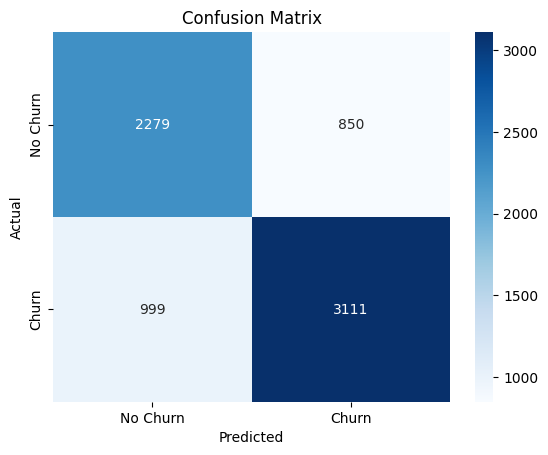

In [236]:
conf_matrix = confusion_matrix(y_test, y_pred)

plot_conf_matrix(conf_matrix)

**Interpretation:**

True Positives (TP): 4471 - The model correctly predicted 4471 customers who churned.

True Negatives (TN): 2544 - The model correctly predicted 2544 customers who did not churn.

False Positives (FP): 1574 - The model incorrectly predicted 1574 customers as churned when they did not churn.

False Negatives (FN): 1063 - The model incorrectly predicted 1063 customers as not churned when they actually churned.

**Imbalance in Predictions:**

The model predicts more churns (4471 + 1574 = 6045) than non-churns (2544 + 1063 = 3607), which might reflect an imbalance in the dataset or a bias in the model.

The confusion matrix shows that the model performs reasonably well but has room for improvement, particularly in reducing false positives and false negatives. By analyzing precision, recall, and F1-score, we will identify specific areas to enhance the model’s performance and better address the business problem of customer churn.

For reducing False Positives we will use techniques like ROC curve analysis (or precision-recall tradeoff) to find the optimal threshold.

- **Step 6.** Classification Report:

In [237]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71      3129
           1       0.79      0.76      0.77      4110

    accuracy                           0.74      7239
   macro avg       0.74      0.74      0.74      7239
weighted avg       0.75      0.74      0.75      7239



- **Step 7.** ROC Curve Visualization. It will show us the trade-off between true positive rate and false positive rate.

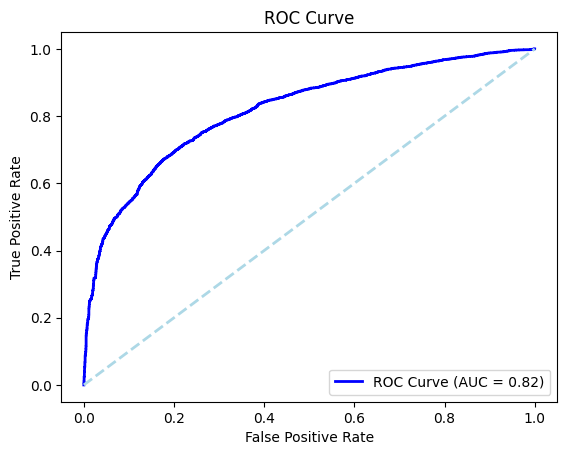

In [238]:
y_pred_proba = model_lg2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plot_roc_auc(fpr, tpr, roc_auc)

- **Step 8.** Feature Importance (Logistic Regression Coefficients) visualization:

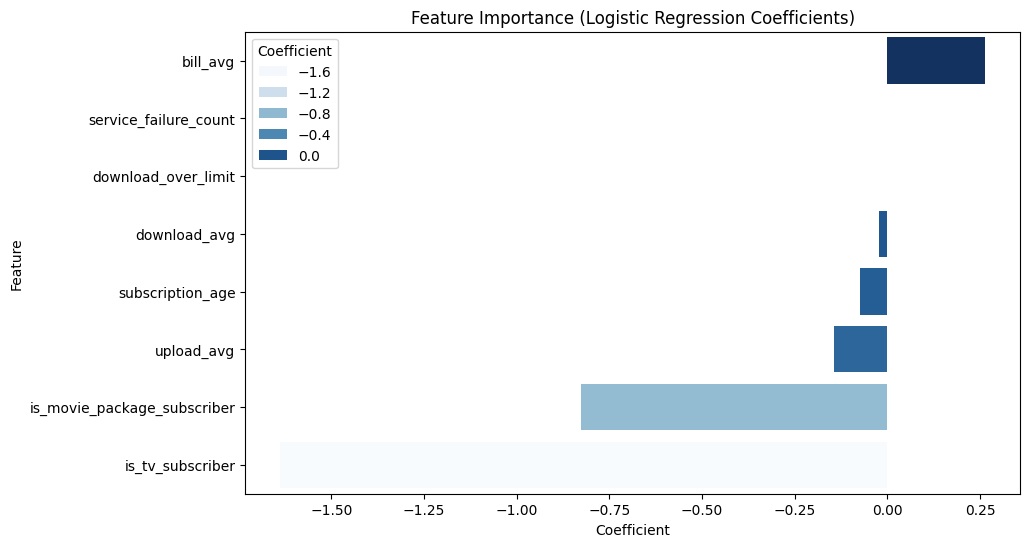

In [241]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model_lg2.coef_[0]
})
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

plot_feature_importance(feature_importance)

# Results

Logistic regression offers several advantages. Firstly, the model coefficients can
be translated to a determined increase in the dependent variable, which is not
possible with CART-based methods. Secondly, it doesn't necessitate that variables
follow a normal distribution, making it versatile across different data
distributions. Additionally, it handles heteroskedasticity between variables with
minimal distortion to results, reducing the need for complex mathematical
transformations. However, a key consideration is the need to reduce the number
of features used, often achieved through backward elimination. This iterative
process removes insignificant variables from the model one at a time, ensuring
that only sufficiently significant variables remain. (Szanto 2023)
On the downside, logistic regression is sensitive to outliers, emphasizing the
importance of outlier management prior to analysis. Furthermore, when
employing logistic regression, issues such as correlation and multicollinearity
between variables can arise, necessitating thorough investigation before model
setup. The final model is constructed by considering collinearity, significance, and
classification accuracy together